In [ ]:
# 导入三方库
import csv
import jieba

In [3]:
# 加载csv文件
filename = './comments.csv'
fp = open(filename, 'r')
reader = csv.DictReader(f=fp)
# 跳过列名
next(reader)

OrderedDict([('creationTime', '2018-11-22 14:53:07'),
             ('user', '浮***末'),
             ('referenceName', '美的（Midea） 60升 速热增容LED触控大屏 电热水器 F6030-A6(HEY)'),
             ('content',
              '美的三佰优橞卷：质量好（  djd.red/2m ）复/.置/输入括呺/内@内蓉，/到.，流览嚣打开#领/曲。非常好外观漂亮，做工精致，可以远程控制，非常方便，保温性能满意，希望耐用。美的的安装服务不错，加装的管和接头收费*元，不贵。使用过程中经常有哒哒响，应该是继电器的声音吧。外观大气上档次,颜色玫瑰金色,非常好看,很高大上档次,液晶屏数字很大,方便观察,按钮简洁大方。功率够用容量够用,单位安装,多人洗热水丝毫不耽误,用水自动断电,能听见空开断电的声音,让人很踏实。总体来说挺满意。这款美的热水器真的很棒！液晶屏配上金色的装饰显得高档。可以整胆或者半胆加热，加上85%的热水输出率，让一级能效的它，更加节能！还有APP智能遥控软件，功能一目了然，调温.加热一按就搞定，非常方便操作。外观精美，显示屏幕大，烧水速度挺快的，使用起来放心安全！省电，安全，还可以实时预约功能，只需设置洗浴时间，就能使用热水。出水断电很安全，科技感也很足，可以手机APP操作！美的产品质量好，外观漂亮，大小合适，免费安装，感觉自己赚了！！有快递公司，服务态度超棒，约好时间后，售后马上来安装了！满分！')])

In [4]:
# 获取评论列表
comment_list = []
for row in reader:
    comment_list.append(row['content'])
print(len(comment_list))

599


In [5]:
# 取前十条评论做数据集
partial = comment_list[:10]

In [6]:
# 载入停用词
stopword = './stop_list.txt'
stop_list = []
with open(stopword, 'r') as fp:
    stop_list = fp.read()
stop_list = stop_list.split('\n')

In [7]:
# 过滤停用词
text = ";".join(partial)
cut_partial_text = " ".join([word for word in jieba.cut(text) if word not in stop_list])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/0n/3w7hl5ps2g5fw7gcyp4d3_4h0000gn/T/jieba.cache
Loading model cost 0.984 seconds.
Prefix dict has been built succesfully.


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 399.5, 199.5, -0.5)

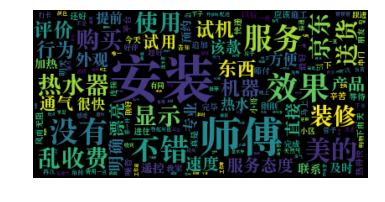

In [8]:
# 词云显示
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="Songti.ttc").generate(cut_partial_text)
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")